In [10]:
import geopandas as gpd
import pandas as pd

In [11]:
slow_roads_lines = gpd.read_file('data/slow_roads_lines.geojson')

In [12]:
data = slow_roads_lines
data.head(3)

,id,category,category_name,dates,free_speed_to_limit,length,region,geom_length,geometry
0,47739,6,6. дороги местного значения,2021-04-23_2021-07-21,0.614507,10,Архангельская область,23.547255,"MULTILINESTRING ((4474274.758 9481185.863, 447..."
1,47740,7,7. дороги минимальной значимости,2021-04-23_2021-07-21,0.789163,434,Архангельская область,1007.909813,"MULTILINESTRING ((4511461.924 9477499.630, 451..."
2,47741,4,4. региональные дороги,2021-04-23_2021-07-21,0.829676,475,Архангельская область,1077.670386,"MULTILINESTRING ((4280110.634 9308659.967, 427..."


In [13]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
slow_roads_lines = data

WGS 84 / Pseudo-Mercator
WGS 84


<Axes: >

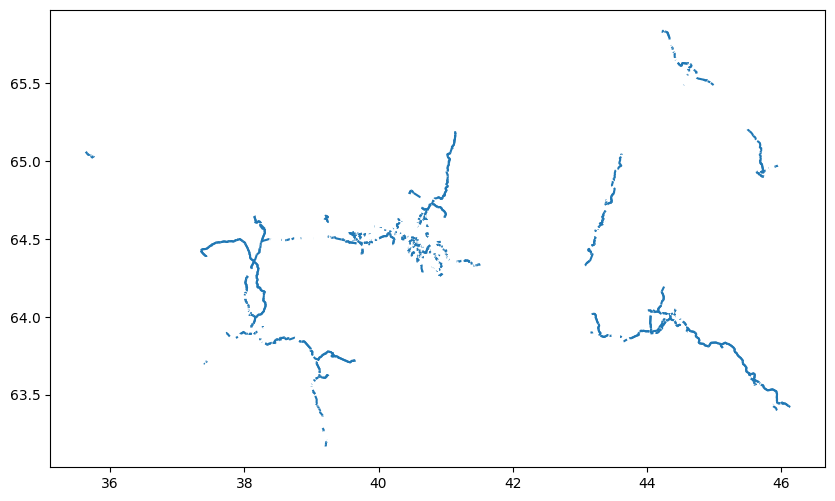

In [14]:
data.plot(figsize=(10,10))

In [15]:
data.head(3)

,id,category,category_name,dates,free_speed_to_limit,length,region,geom_length,geometry
0,47739,6,6. дороги местного значения,2021-04-23_2021-07-21,0.614507,10,Архангельская область,23.547255,"MULTILINESTRING ((40.19309 64.51276, 40.19325 ..."
1,47740,7,7. дороги минимальной значимости,2021-04-23_2021-07-21,0.789163,434,Архангельская область,1007.909813,"MULTILINESTRING ((40.52715 64.49851, 40.52712 ..."
2,47741,4,4. региональные дороги,2021-04-23_2021-07-21,0.829676,475,Архангельская область,1077.670386,"MULTILINESTRING ((38.44889 63.83766, 38.44716 ..."


In [18]:
all_res = []

def convert(objectid):
    part = data[data.id == objectid]
    for _, row in part.iterrows():
        seq = row.geometry.geoms

        for curve in seq:
            x, y = curve.xy
            pairs = zip(x, y)
            order = 0
            for pair in pairs:
                obj = {}
                obj['id'] = objectid
                obj['category'] = row.category
                obj['category_name'] = row.category_name
                obj['dates'] = row.dates
                obj['free_speed_to_limit'] = row.free_speed_to_limit
                obj['length'] = row.length
                obj['region'] = row.region
                obj['geom_length'] = row.geom_length
                obj['order'] = order
                obj['geometry'] = [pair[1], pair[0]]
                order = order + 1
                all_res.append(obj)
            break

data = slow_roads_lines
objectids = data.id
#objectids = [ 47739 ]
for objectid in objectids:
    convert(objectid)

slow_roads_lines_df = pd.DataFrame(all_res)
data = slow_roads_lines_df
data

,id,category,category_name,dates,free_speed_to_limit,length,region,geom_length,order,geometry
0,47739,6,6. дороги местного значения,2021-04-23_2021-07-21,0.614507,10,Архангельская область,23.547255,0,"[64.51276300014706, 40.193094000124155]"
1,47739,6,6. дороги местного значения,2021-04-23_2021-07-21,0.614507,10,Архангельская область,23.547255,1,"[64.51270199991295, 40.19325099958468]"
2,47740,7,7. дороги минимальной значимости,2021-04-23_2021-07-21,0.789163,434,Архангельская область,1007.909813,0,"[64.49850999993336, 40.52715199962632]"
3,47740,7,7. дороги минимальной значимости,2021-04-23_2021-07-21,0.789163,434,Архангельская область,1007.909813,1,"[64.49918788894162, 40.527119333289335]"
4,47740,7,7. дороги минимальной значимости,2021-04-23_2021-07-21,0.789163,434,Архангельская область,1007.909813,2,"[64.50001977816521, 40.5271416672039]"
...,...,...,...,...,...,...,...,...,...,...
26271,53653,4,4. региональные дороги,2021-04-23_2021-07-21,0.947810,497,Архангельская область,1133.483677,5,"[64.0241438821309, 38.09560394123046]"
26272,53653,4,4. региональные дороги,2021-04-23_2021-07-21,0.947810,497,Архангельская область,1133.483677,6,"[64.02356041182138, 38.09596370572196]"
26273,53653,4,4. региональные дороги,2021-04-23_2021-07-21,0.947810,497,Архангельская область,1133.483677,7,"[64.02268594093158, 38.09649947083888]"
26274,53653,4,4. региональные дороги,2021-04-23_2021-07-21,0.947810,497,Архангельская область,1133.483677,8,"[64.02181147098013, 38.0970362348824]"


In [19]:
data.to_csv('data/slow_roads_lines_lense.csv', index=False)